In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv('X-IIoT dataset.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/X-IIoT dataset.csv')


<ipython-input-4-f3085a139ac5>:1: DtypeWarning: Columns (1,3,5,12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/X-IIoT dataset.csv')


In [ ]:
df.head()

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,...,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class1,class2,class3
0,09-01-2020,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,...,5,0,0,0,0,0,0,Scanning_vulnerability,Reconnaissance,Attack
1,13-01-2020,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,...,0,0,0,0,0,0,0,Normal,Normal,Normal
2,09-01-2020,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,...,0,0,0,0,0,0,0,Normal,Normal,Normal
3,27-02-2020,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,...,0,1,1,1,1,1,1,Normal,Normal,Normal
4,16-12-2019,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,...,0,0,0,0,0,0,0,Normal,Normal,Normal


In [ ]:
df['class3'].value_counts()

Normal    421417
Attack    399417
Name: class3, dtype: int64

In [ ]:
df.shape

(820834, 68)

In [ ]:
df = df.drop(['class2','class1'],axis=1)

In [ ]:
df.isnull().sum()

Date                           331
Timestamp                      297
Scr_IP                           0
Scr_port                         0
Des_IP                           0
                              ... 
File_activity                    0
Process_activity                 0
read_write_physical.process      0
is_privileged                    0
class3                           0
Length: 66, dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4260, 66)


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(816574, 66)

In [ ]:
pd.set_option('display.max_columns', 68)  # Set the maximum number of columns to 68
print(df.head(30))

          Date   Timestamp          Scr_IP Scr_port          Des_IP Des_port  \
0   09-01-2020  1578540956   192.168.2.199    49278    192.168.2.10       80   
1   13-01-2020  1578871873        10.0.1.5    39769    131.236.3.92       53   
2   09-01-2020  1578522486     172.24.1.80    59050      172.24.1.1       53   
3   27-02-2020  1582757640   192.168.2.196    37966    192.168.2.10     1880   
4   16-12-2019  1576452612     172.24.1.80    38233      172.24.1.1       53   
5   31-01-2020  1580452611  192.168.10.155    50502    192.168.2.10       80   
6   12-12-2019  1576100087     172.24.1.80    39649      172.24.1.1       53   
7   21-02-2020  1582241330     172.24.1.34    52195      172.24.1.1       53   
8   16-12-2019  1576468008     172.24.1.80    41286      172.24.1.1       53   
9   24-02-2020  1582504530    172.24.1.244    45487      172.24.1.1     5683   
10  13-01-2020  1578873665    172.24.1.213     3467    161.69.36.37       80   
11  09-01-2020  1578542271   192.168.2.1

In [ ]:
df = df.astype('str')

In [ ]:
df.replace('-', np.nan, inplace=True)
df.replace('excel', np.nan, inplace=True)
df.replace('?', np.nan, inplace=True)


# Convert the columns with hyphens to numeric data type
cols_with_hyphens = ['Scr_bytes','Des_bytes','Scr_pkts','Scr_ip_bytes', 'Des_pkts','Des_ip_bytes','total_bytes','total_packet','paket_rate','byte_rate','Scr_packts_ratio','Des_pkts_ratio','Scr_bytes_ratio','Des_bytes_ratio'] # Replace with the actual column names
df[cols_with_hyphens] = df[cols_with_hyphens].astype(float)

# Calculate median values for each feature
median_values = df.median()

# Replace NaN values with median values in the DataFrame
df.fillna(median_values, inplace=True)

<ipython-input-16-5edc0f32814b>:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()


In [ ]:
pd.set_option('display.max_columns', 68)  # Set the maximum number of columns to 68
print(df.head(30))

          Date   Timestamp          Scr_IP Scr_port          Des_IP Des_port  \
0   09-01-2020  1578540956   192.168.2.199    49278    192.168.2.10       80   
1   13-01-2020  1578871873        10.0.1.5    39769    131.236.3.92       53   
2   09-01-2020  1578522486     172.24.1.80    59050      172.24.1.1       53   
3   27-02-2020  1582757640   192.168.2.196    37966    192.168.2.10     1880   
4   16-12-2019  1576452612     172.24.1.80    38233      172.24.1.1       53   
5   31-01-2020  1580452611  192.168.10.155    50502    192.168.2.10       80   
6   12-12-2019  1576100087     172.24.1.80    39649      172.24.1.1       53   
7   21-02-2020  1582241330     172.24.1.34    52195      172.24.1.1       53   
8   16-12-2019  1576468008     172.24.1.80    41286      172.24.1.1       53   
9   24-02-2020  1582504530    172.24.1.244    45487      172.24.1.1     5683   
10  13-01-2020  1578873665    172.24.1.213     3467    161.69.36.37       80   
11  09-01-2020  1578542271   192.168.2.1

In [ ]:
df[cols_with_hyphens].dtypes

Scr_bytes           float64
Des_bytes           float64
Scr_pkts            float64
Scr_ip_bytes        float64
Des_pkts            float64
Des_ip_bytes        float64
total_bytes         float64
total_packet        float64
paket_rate          float64
byte_rate           float64
Scr_packts_ratio    float64
Des_pkts_ratio      float64
Scr_bytes_ratio     float64
Des_bytes_ratio     float64
dtype: object

In [ ]:
df['class3'].value_counts()

Normal    419275
Attack    397299
Name: class3, dtype: int64

In [ ]:
df.dtypes

Date                           object
Timestamp                      object
Scr_IP                         object
Scr_port                       object
Des_IP                         object
                                ...  
File_activity                  object
Process_activity               object
read_write_physical.process    object
is_privileged                  object
class3                         object
Length: 66, dtype: object

In [ ]:
df['File_activity'].dtypes

dtype('O')

In [ ]:
#df = df.drop(['is_with_payload', 'OSSEC_alert_level', 'is_privileged', 'Process_activity', 'Succesful_login', 'FIN or RST', 'is_pure_ack', 'File_activity'],axis=1)

In [ ]:
#storing int types in df2
df2 = df[['Conn_state','OSSEC_alert','Login_attempt','read_write_physical.process','OSSEC_alert_level','is_privileged','Process_activity','Succesful_login','File_activity']].copy()

In [ ]:
#int types dropped from df
df_ = df.drop(['Conn_state','OSSEC_alert','Login_attempt','read_write_physical.process','OSSEC_alert_level','is_privileged','Process_activity','Succesful_login','File_activity'],axis=1)

In [ ]:
df_ = df_.astype('str')

In [ ]:
df.dtypes

Date                           object
Timestamp                      object
Scr_IP                         object
Scr_port                       object
Des_IP                         object
                                ...  
File_activity                  object
Process_activity               object
read_write_physical.process    object
is_privileged                  object
class3                         object
Length: 66, dtype: object

In [ ]:
#encoding the string types using labelencoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df_ = df_.apply(LabelEncoder().fit_transform)
#onehotencoder = OneHotEncoder()
#X = onehotencoder.fit_transform(X).toarray()

In [ ]:
'''from sklearn.compose import ColumnTransformer
cat_cols = ['Protocol', 'Service']
cat_transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), cat_cols)], remainder='passthrough')
df = cat_transformer.fit_transform(df)'''

"from sklearn.compose import ColumnTransformer\ncat_cols = ['Protocol', 'Service']\ncat_transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), cat_cols)], remainder='passthrough')\ndf = cat_transformer.fit_transform(df)"

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
#tf.data.experimental.enable_debug_mode()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#scaling the numerical features using minmax scaler
'''scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_num)'''

'scaler = MinMaxScaler()\nscaled = scaler.fit_transform(X_num)'

In [ ]:
#joining the df and df2 data frames
dfnew = df_.join(df2)

In [ ]:
dfnew.head()

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,missed_bytes,is_syn_only,Is_SYN_ACK,is_pure_ack,is_with_payload,FIN or RST,Bad_checksum,is_SYN_with_RST,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,anomaly_alert,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Avg_user_time,Std_user_time,Avg_nice_time,Std_nice_time,Avg_system_time,Std_system_time,Avg_iowait_time,Std_iowait_time,Avg_ideal_time,Std_ideal_time,Avg_tps,Std_tps,Avg_rtps,Std_rtps,Avg_wtps,Std_wtps,Avg_ldavg_1,Std_ldavg_1,Avg_kbmemused,Std_kbmemused,Avg_num_Proc/s,Std_num_proc/s,Avg_num_cswch/s,std_num_cswch/s,class3,Conn_state,OSSEC_alert,Login_attempt,read_write_physical.process,OSSEC_alert_level,is_privileged,Process_activity,Succesful_login,File_activity
0,13,45487,25,37285,63,6020,2,4,88456,2111,17147,0,1,1,1,1,1,0,0,26,8382,57,21186,2,1088,981,211433,55153,18669,1324,55923,16791,11863,28265,1662,28925,4552,44199,159,1094,2382,42454,372,758,2086,642,1324,6307,2471,1378,16784,28835,895,1363,13994,4087,0,1,1,0,0,5,0,0,0,0
1,19,54066,2,27007,12,4973,3,2,82,19236,0,0,0,0,0,1,0,0,0,330,3589,0,0,0,35724,925,186941,126774,19993,0,72714,0,2876,38645,2821,36980,3505,46983,4490,24425,3729,46331,3347,17931,0,0,1549,7970,902,433,6511,43063,78,239,8420,17286,1,1,0,0,0,0,0,0,0,0
2,13,36819,16,47838,51,4973,3,2,131,12457,18051,0,0,0,0,1,0,0,0,1,29089,1,39594,0,35286,925,125838,52952,18669,1324,67274,5440,9488,36662,229,2085,665,7173,4169,22242,12140,34922,2850,17117,1549,12679,1624,6859,780,110,26591,21894,78,1,9085,26012,1,1,0,0,0,0,0,0,0,0
3,45,232728,24,25062,63,1192,2,16,324050,778,20885,0,1,1,1,1,1,0,0,1098,5451,1090,48607,0,47772,461,80704,187494,19677,316,71301,1413,1296,45829,1605,34230,3700,41078,348,5136,7300,2467,2405,13264,1339,9659,1464,8265,1035,238,16837,51311,967,2241,10364,46136,1,1,0,1,1,0,1,1,1,1
4,25,5730,16,25352,51,4973,3,2,73,3320,42231,0,0,0,0,1,0,0,0,330,27441,1,44877,0,22451,1230,213703,51101,19510,483,67703,5011,7739,32704,2193,26173,1498,31451,1698,23264,12134,41461,3701,173,9,19,1963,256,751,329,21857,25925,39,61,6650,34893,1,1,0,0,0,0,0,0,0,0


In [ ]:
X = dfnew.drop(['class3'], axis=1)
y = df['class3']

In [ ]:
X.shape, y.shape

((816574, 65), (816574,))

In [ ]:
dfnew['class3'].value_counts()

1    419275
0    397299
Name: class3, dtype: int64

In [ ]:
y.value_counts()

Normal    419275
Attack    397299
Name: class3, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=60, replacement=True)# fit predictor and target variable
X_balanced, y_balanced = rus.fit_resample(X, y)


In [ ]:
X_balanced.shape, y_balanced.shape

((794598, 65), (794598,))

In [ ]:
y_balanced.value_counts()

Attack    397299
Normal    397299
Name: class3, dtype: int64

In [ ]:
df_b = pd.concat([X_balanced, y_balanced],axis=1)

In [ ]:
df_b.shape

(794598, 66)

<ipython-input-41-7056e106c658>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_b.corr()


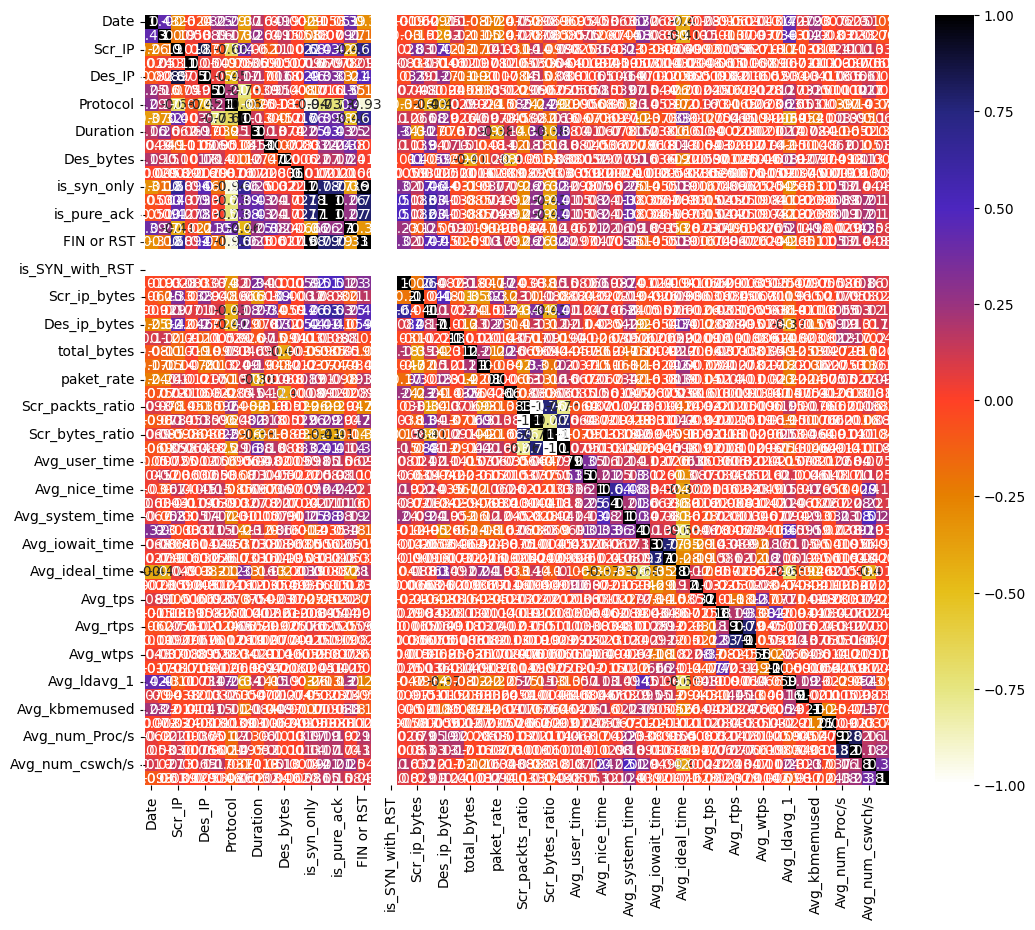

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = df_b.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features=correlation(df_b,0.9)
print(len(set(corr_features)))
print(corr_features)

<ipython-input-42-0602f45f5952>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


7
{'is_syn_only', 'Des_bytes_ratio', 'Std_num_proc/s', 'is_pure_ack', 'Des_pkts_ratio', 'Des_IP', 'FIN or RST'}


In [ ]:
df_c = df_b.drop(['Des_bytes_ratio', 'Des_IP', 'Std_num_proc/s', 'FIN or RST', 'Des_pkts_ratio', 'is_pure_ack'],axis=1)

In [ ]:
X__balanced = df_c.drop(['class3'],axis=1)
y__balanced = df_c['class3']

In [ ]:
from sklearn.preprocessing import LabelEncoder as le
#testdata.attack_cat = le().fit_transform(testdata.attack_cat)
y__balanced = le().fit_transform(y__balanced)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X__balanced,y__balanced, test_size=0.3,random_state=0)

In [ ]:
X_train.shape,y_train.shape

((556218, 59), (556218,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


In [ ]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train_re = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test_re = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_train_re.shape

(556218, 59, 1)

In [ ]:
X_train_re_re = np.reshape(np.array(X_train), (X_train.shape[0],1, X_train.shape[1]))
X_test_re_re = np.reshape(np.array(X_test), (X_test.shape[0],1, X_test.shape[1]))

In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, accuracy_score,mean_squared_error,mean_absolute_error)

### **LSTM**

In [ ]:
from keras.regularizers import l1

model = Sequential()
model.add(LSTM(64, input_dim=59, return_sequences=True, activation='relu',
               kernel_regularizer=l1(0.001), recurrent_regularizer=l1(0.0001)))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=True, activation='relu',
               kernel_regularizer=l1(0.001), recurrent_regularizer=l1(0.0001)))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False, activation='relu',
               kernel_regularizer=l1(0.001), recurrent_regularizer=l1(0.001)))
model.add(Dense(19))
model.add(Activation('softmax'))

In [ ]:
model = Sequential()
model.add(LSTM(28,input_dim=59, return_sequences=True, activation = 'tanh'))
model.add(Dropout(0.6))
model.add(LSTM(28, return_sequences=True, activation = 'tanh'))
model.add(Dropout(0.5))
model.add(LSTM(28, return_sequences=False, activation = 'tanh'))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [ ]:
epochs=500
learning_rate=0.01

from keras.optimizers import SGD
sgd=SGD(learning_rate=0.001, momentum=0.9)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
history = model.fit(X_train_re_re, y_train, validation_split=0.15, epochs = 10, batch_size = 64, verbose=2)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
7388/7388 - 652s - loss: 0.0866 - accuracy: 0.9700 - val_loss: 0.0247 - val_accuracy: 0.9916 - 652s/epoch - 88ms/step
Epoch 2/10
7388/7388 - 597s - loss: 0.0356 - accuracy: 0.9878 - val_loss: 0.0128 - val_accuracy: 0.9964 - 597s/epoch - 81ms/step
Epoch 3/10
7388/7388 - 597s - loss: 0.0265 - accuracy: 0.9910 - val_loss: 0.0095 - val_accuracy: 0.9976 - 597s/epoch - 81ms/step
Epoch 4/10
7388/7388 - 647s - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.0084 - val_accuracy: 0.9977 - 647s/epoch - 88ms/step
Epoch 5/10
7388/7388 - 600s - loss: 0.0205 - accuracy: 0.9930 - val_loss: 0.0073 - val_accuracy: 0.9979 - 600s/epoch - 81ms/step
Epoch 6/10
7388/7388 - 634s - loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.0064 - val_accuracy: 0.9981 - 634s/epoch - 86ms/step
Epoch 7/10
7388/7388 - 610s - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0063 - val_accuracy: 0.9982 - 610s/epoch - 83ms/step
Epoch 8/10
7388/7388 - 598s - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.0056 - val_accuracy: 

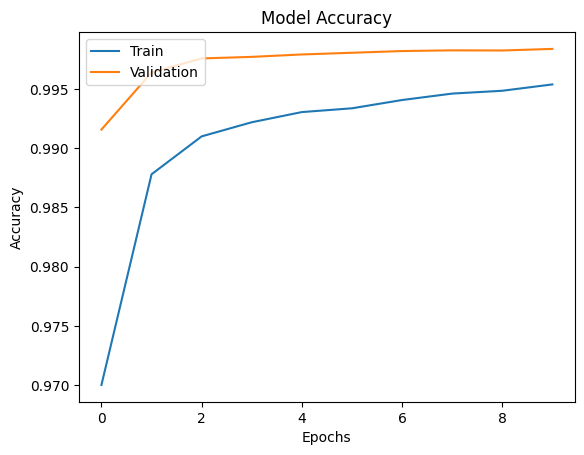

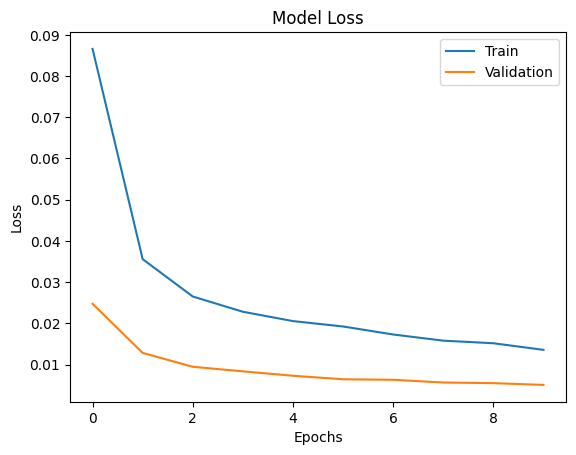

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test_re_re, y_test)

7450/7450 [==============================] - 293s 39ms/step - loss: 0.0055 - accuracy: 0.9986


In [ ]:
y_pred = model.predict(X_test_re_re)

7450/7450 [==============================] - 207s 28ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
classes = ['Bruteforce','command control','Dictionary','Discovering resources','Exfiltration','Fake notification','False data injection']

Accuracy:  0.9985611208994043
Precision: 0.9986
Recall: 0.9986
F1 Score: 0.9986


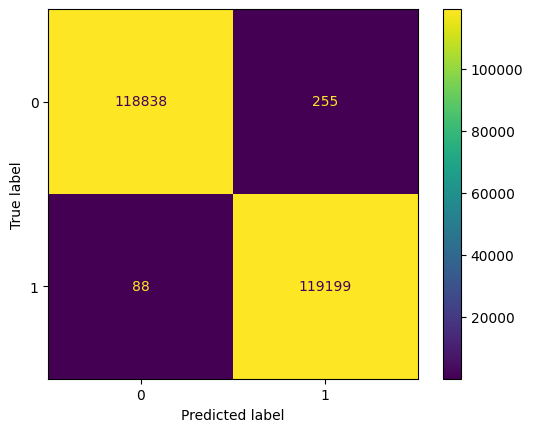

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='micro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'micro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='micro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

### **CNN**

In [ ]:
cnn = Sequential()
cnn.add(Convolution1D(32, 3,activation="relu",input_shape=(59, 1)))
cnn.add(MaxPooling1D(2))
cnn.add(Convolution1D(32,3, activation="relu"))
cnn.add(MaxPooling1D(2))
cnn.add(Convolution1D(32, 3, activation="relu"))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation="sigmoid"))

In [ ]:
cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
history = cnn.fit(X_train_re, y_train, validation_split=0.3, epochs = 10, batch_size = 100, verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


3894/3894 - 283s - loss: 0.0505 - accuracy: 0.9826 - val_loss: 0.0168 - val_accuracy: 0.9945 - 283s/epoch - 73ms/step
Epoch 2/10
3894/3894 - 283s - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0079 - val_accuracy: 0.9975 - 283s/epoch - 73ms/step
Epoch 3/10
3894/3894 - 288s - loss: 0.0087 - accuracy: 0.9972 - val_loss: 0.0049 - val_accuracy: 0.9985 - 288s/epoch - 74ms/step
Epoch 4/10
3894/3894 - 291s - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0065 - val_accuracy: 0.9980 - 291s/epoch - 75ms/step
Epoch 5/10
3894/3894 - 286s - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0038 - val_accuracy: 0.9987 - 286s/epoch - 73ms/step
Epoch 6/10
3894/3894 - 284s - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0082 - val_accuracy: 0.9969 - 284s/epoch - 73ms/step
Epoch 7/10
3894/3894 - 282s - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0118 - val_accuracy: 0.9986 - 282s/epoch - 72ms/step
Epoch 8/10
3894/3894 - 289s - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0065 - val_accuracy: 0.9977 - 28

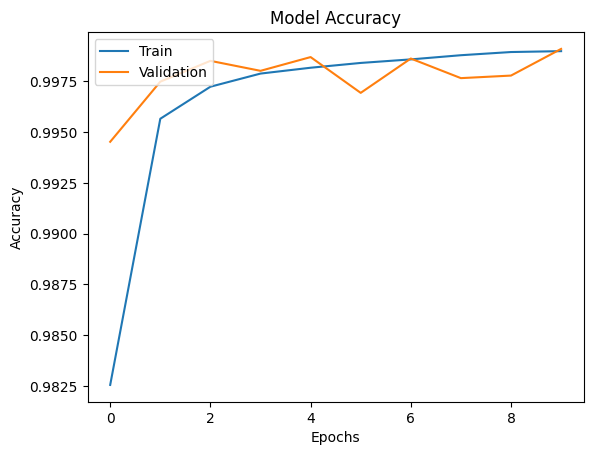

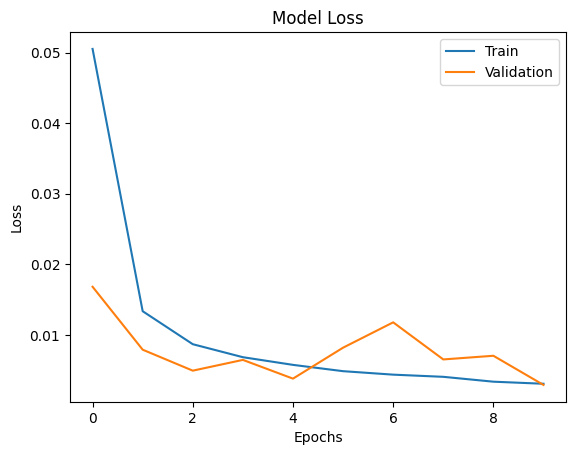

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
loss, accuracy = cnn.evaluate(X_test_re, y_test)

7450/7450 [==============================] - 158s 21ms/step - loss: 0.0031 - accuracy: 0.9991


In [ ]:
y_pred = cnn.predict(X_test_re)

7450/7450 [==============================] - 86s 11ms/step


In [ ]:
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

Accuracy:  0.9990729088010739
Precision: 0.9991
Recall: 0.9991
F1 Score: 0.9991


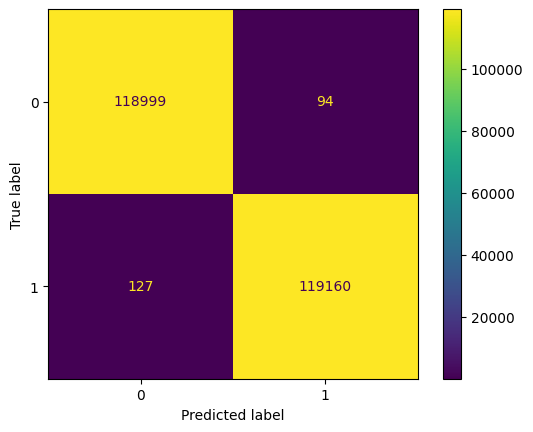

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

### **CNN-LSTM**

In [ ]:

lstm_output_size = 70

cnnlstm = Sequential()
cnnlstm.add(Convolution1D(32, 3,activation="relu",input_shape=(59, 1)))
cnnlstm.add(MaxPooling1D(2))
cnnlstm.add(Convolution1D(32, 3,activation="relu"))
cnnlstm.add(MaxPooling1D(2))
cnnlstm.add(LSTM(lstm_output_size))
cnnlstm.add(Dropout(0.1))
cnnlstm.add(Dense(2, activation="softmax"))

In [ ]:
cnnlstm.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
history = cnnlstm.fit(X_train_re, y_train, validation_split=0.15, epochs = 10, batch_size = 256, verbose=2)

Epoch 1/10
3940/3940 - 563s - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0033 - val_accuracy: 0.9989 - 563s/epoch - 143ms/step
Epoch 2/10
3940/3940 - 559s - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0028 - val_accuracy: 0.9990 - 559s/epoch - 142ms/step
Epoch 3/10
3940/3940 - 554s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0020 - val_accuracy: 0.9993 - 554s/epoch - 140ms/step
Epoch 4/10
3940/3940 - 560s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9989 - 560s/epoch - 142ms/step
Epoch 5/10
3940/3940 - 562s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9988 - 562s/epoch - 143ms/step
Epoch 6/10
3940/3940 - 558s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0014 - val_accuracy: 0.9995 - 558s/epoch - 142ms/step
Epoch 7/10
3940/3940 - 555s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0015 - val_accuracy: 0.9995 - 555s/epoch - 141ms/step
Epoch 8/10
3940/3940 - 555s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0014 - val_acc

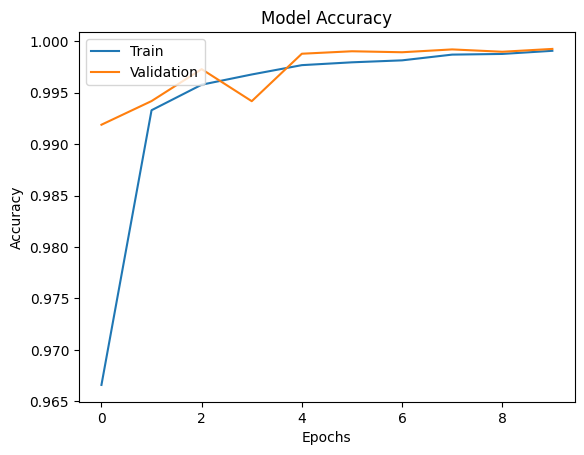

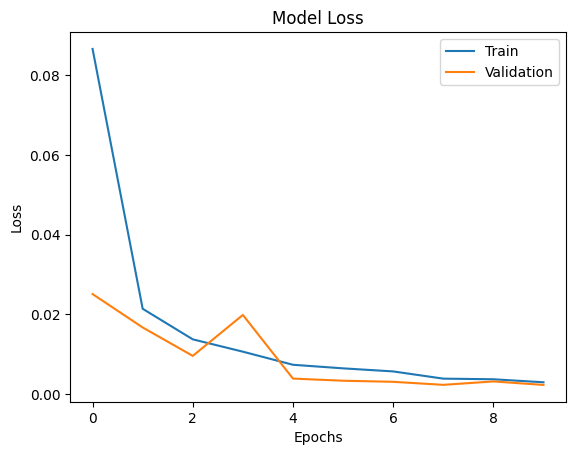

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
loss, accuracy = cnnlstm.evaluate(X_test_re, y_test)
y_pred = cnnlstm.predict(X_test_re)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

7450/7450 [==============================] - 282s 38ms/step


Accuracy:  0.9970425371255978
Precision: 0.9970
Recall: 0.9970
F1 Score: 0.9970


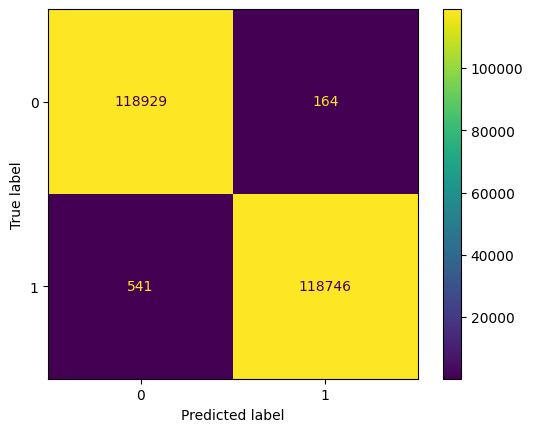

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


In [ ]:
gru = Sequential()
gru.add(GRU(128,input_dim=59, return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(128, return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(128, return_sequences=True))
gru.add(Dropout(0.1))
gru.add(GRU(128, return_sequences=False))
gru.add(Dropout(0.1))
gru.add(Dense(2))
gru.add(Activation('softmax'))

In [ ]:
gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = gru.fit(X_train_re_re, y_train, validation_split=0.15, epochs = 10, batch_size = 256, verbose=2)


Epoch 1/10
1847/1847 - 319s - loss: 0.0485 - accuracy: 0.9835 - val_loss: 0.0149 - val_accuracy: 0.9947 - 319s/epoch - 173ms/step
Epoch 2/10
1847/1847 - 318s - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.0055 - val_accuracy: 0.9983 - 318s/epoch - 172ms/step
Epoch 3/10
1847/1847 - 300s - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.0043 - val_accuracy: 0.9987 - 300s/epoch - 163ms/step
Epoch 4/10
1847/1847 - 302s - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0034 - val_accuracy: 0.9989 - 302s/epoch - 163ms/step
Epoch 5/10
1847/1847 - 295s - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0041 - val_accuracy: 0.9987 - 295s/epoch - 159ms/step
Epoch 6/10
1847/1847 - 294s - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0024 - val_accuracy: 0.9992 - 294s/epoch - 159ms/step
Epoch 7/10
1847/1847 - 323s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 0.9992 - 323s/epoch - 175ms/step
Epoch 8/10
1847/1847 - 301s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0028 - val_acc

In [ ]:
loss, accuracy = gru.evaluate(X_test_re_re, y_test)
y_pred = gru.predict(X_test_re_re)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

7450/7450 [==============================] - 332s 45ms/step


Accuracy:  0.9992700729927008
Precision: 0.9993
Recall: 0.9993
F1 Score: 0.9993


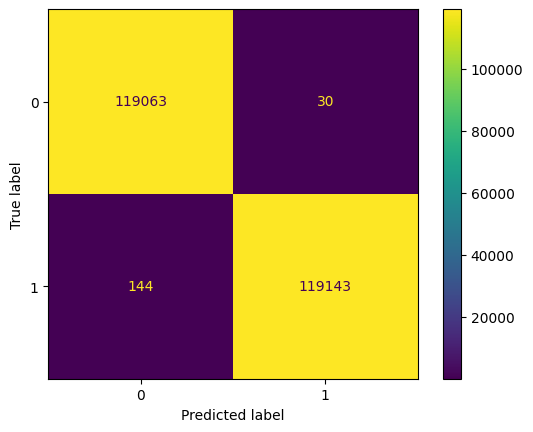

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test_labels,y_pred_labels)
print("Accuracy: ", metrics.accuracy_score(y_test_labels,y_pred_labels))
print('Precision: %.4f' % precision_score(y_test_labels, y_pred_labels, average='macro'))
print('Recall: %.4f' % recall_score(y_test_labels, y_pred_labels,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test_labels, y_pred_labels, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()


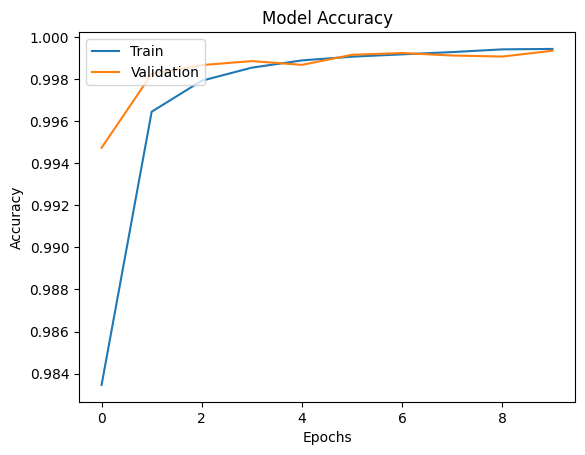

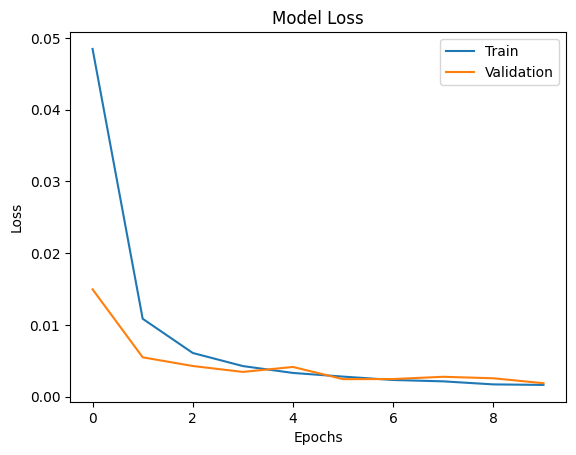

In [ ]:
# Plotting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plotting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()